Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 3.9451s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 4.1981s
Evolving from  499.99999999999994  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 4.1312s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 4.2647s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces em

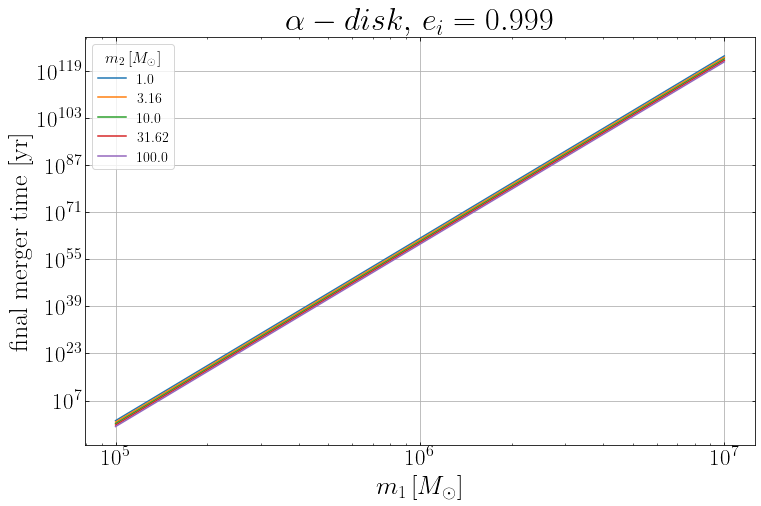

In [3]:
# Final merger time for the reference systems with masses m_1 = 1e5 M_solar
# and m_2 = 1 M_solar, as a function of the initial 
# angular momentum j0 for binaries having Power Law PDF (1-1e5) for PBHs having alpha-disk 
# with dynamical friction (Ostriker) as dissipative force.

%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
from accretion import *
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.special import gamma
import mass_function
from imripy import halo, constants as c, merger_system as ms, inspiral, waveform, detector, plot_utils
from imripy.inspiral import forces
import imripy.constants as c

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
solar_mass_to_pc = 4.8e-14
year_to_pc = 0.3064





# Setting initial and final conditions of the binary evolution for an eccentric orbit
e0 = 0.999

      
m1_arr = np.geomspace(1e5, 1e7, 10)  # in units of solar mass
m2_arr = np.geomspace(1, 100, 5)  # in units of solar mass
m1_list = m1_arr.tolist()
m2_list = m2_arr.tolist()



    
plt.figure(figsize = (12, 7.5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)



for k, m2 in enumerate(m2_list):
    t_m1_list = np.zeros(len(m1_list))
    for i, m1 in enumerate(m1_list):
        m1 =  m1_list[i] * solar_mass_to_pc  
        m2 =  m2 * solar_mass_to_pc  
        D = 0
        accuracy = 1e-13
        alpha = 0.1
        f_edd = 0.1
        eps = 0.1
        sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
        alphaDisk = halo.AlphaDisk(m1, alpha, f_edd, eps)
        sp_b_alpha = ms.SystemProp(m1, m2, halo.ConstHalo(0.), baryonicHalo = alphaDisk, D=D)
        opt_DF = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                                 considerRelativeVelocities=True, progradeRotation=False, accuracy=accuracy, verbose=1)
        a0  =  500 * sp_0.r_isco()  #  a_i = (1e11 * r_isco of 1000 solar mass) in units of parsec
        R_fin = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso

        ev_alpha = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, a_fin = R_fin)
        t_m1_list[i] = ev_alpha.t[-1]/year_to_pc
        
    plt.loglog(m1_list, t_m1_list, '')
    slope, intercept = np.polyfit(np.log(m1_list), np.log(t_m1_list), 1)
    print('\v')
    print("intercept = ", '%0.4f'%intercept, "$,\,$" , "m =", '%0.4f'%slope)
   

    
    
plt.legend([m2_list[0], '%0.2f'%m2_list[1], m2_list[2], '%0.2f'%m2_list[3]
           ,m2_list[4]], title = '$m_{2} \: [M_{\odot}]$',
            title_fontsize = 16, loc = 'upper left', prop = {"size":14})
plt.xlabel('$m_{1} \, [M_{\odot}]$', fontsize = 26)
plt.ylabel('final merger time  [yr]', fontsize = 26)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.title(r'$ \alpha - disk,\, e_{i} = 0.999$', fontsize = 32, pad = 9)
plt.savefig("t_mvsm1_α.pdf")
plt.grid()
plt.show()

Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 3.8093s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 3.7579s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 3.9447s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 3.8174s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss

/tmp/ipykernel_528863/894063427.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("t_mvsm2_α.pdf", fontsize = 32, pad = 9)
/tmp/ipykernel_528863/894063427.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("t_mvsm2_α.pdf", fontsize = 32, pad = 9)


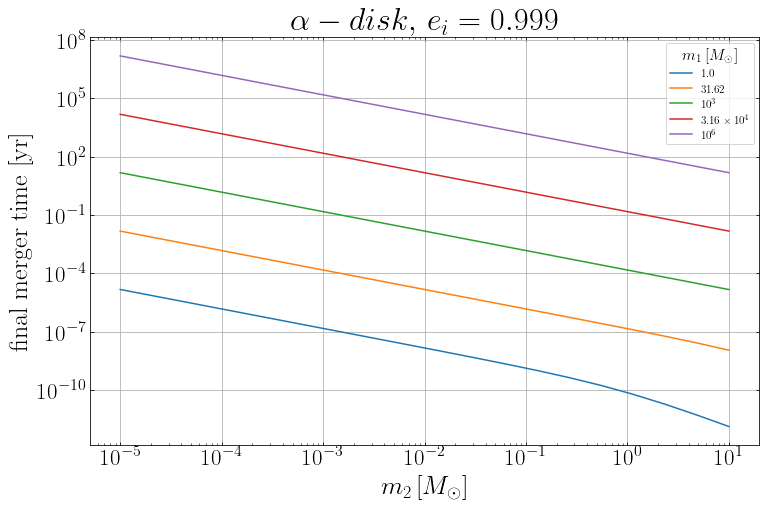

In [6]:
# Setting initial and final conditions of the binary evolution for an eccentric orbit
e0 = 0.999

      
m1_arr = np.geomspace(1, 1e6, 5)  # in units of solar mass
m2_arr = np.geomspace(1e-5, 10, 20)  # in units of solar mass
m1_list = m1_arr.tolist()
m2_list = m2_arr.tolist()

plt.figure(figsize = (12, 7.5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)



for k, m1 in enumerate(m1_list):
    t_m2_list = np.zeros(len(m2_list))
    for i, m2 in enumerate(m2_list):
        m1 =  m1_list[k] * solar_mass_to_pc  
        m2 =  m2 * solar_mass_to_pc  
        D = 0
        accuracy = 1e-13
        alpha = 0.1
        f_edd = 0.1
        eps = 0.1
        sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
        alphaDisk = halo.AlphaDisk(m1, alpha, f_edd, eps)
        sp_b_alpha = ms.SystemProp(m1, m2, halo.ConstHalo(0.), baryonicHalo = alphaDisk, D=D)
        opt_DF = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                                 considerRelativeVelocities=True, progradeRotation=False, accuracy=accuracy, verbose=1)
        a0  =  500 * sp_0.r_isco()  #  a_i = (1e11 * r_isco of 1000 solar mass) in units of parsec
        R_fin = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso

        ev_alpha = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, a_fin = R_fin)
        t_m2_list[i] = ev_alpha.t[-1]/year_to_pc
        
    plt.loglog(m2_list, t_m2_list, '')
    slope, intercept = np.polyfit(np.log(m2_list), np.log(t_m2_list), 1)
    print('\v')
    print("intercept = ", '%0.4f'%intercept, "$,\,$" , "m =", '%0.4f'%slope)

    
    
    
    
plt.legend([m1_list[0], '%0.2f'%m1_list[1], '$10^{3}$', r'$3.16 \times 10^{4}$',
            '$10^{6}$'], title = '$m_{1} \: [M_{\odot}]$',
            title_fontsize = 16, loc = 'upper right', prop = {"size":11})
plt.xlabel('$m_{2} \, [M_{\odot}]$', fontsize = 26)
plt.ylabel('final merger time  [yr]', fontsize = 26)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.title(r'$ \alpha - disk,\, e_{i} = 0.999$', fontsize = 32, pad = 9)
plt.savefig("t_mvsm2_α.pdf", fontsize = 32, pad = 9)
plt.grid()
plt.show() 

In [ ]:
# γ = (61.9345 + 61.9344 + 61.9344)/3 
# γ = 61.9344

# So, t_m_alpha  ∝ m_1^{γ}

In [ ]:
# δ = (-1.0000 - 1.0000 - 1.0003 - 1.0098 - 1.1153)/5
# δ = -1.0251


# So, t_m_alpha  ∝ m_2^{δ}